In [1]:
# CSS style setting
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

# Prepare Data

## Import Toolkits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error , r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax

2024-07-04 19:33:23.264588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 19:33:23.264780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 19:33:23.500527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv", encoding='ISO-8859-1')
print(df.shape)
df.head()

(500, 9)


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Explain

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
purchase_amount = df.groupby('country')['car purchase amount'].sum().reset_index()
purchase_amount

,country,car purchase amount
0,Afghanistan,112035.70145
1,Algeria,238760.34165
2,American Samoa,24221.99937
3,Andorra,156958.79977
4,Angola,88996.00015
...,...,...
206,Western Sahara,88637.13991
207,Yemen,158881.17399
208,Zimbabwe,69205.73116
209,marlal,45107.22566


In [7]:
# Top 10 country who did car purchase
top_10_country = purchase_amount.sort_values(by= 'car purchase amount', ascending= False).head(10)
top_10_country

,country,car purchase amount
85,Israel,295273.97524
83,Iraq,248155.14736
151,Saint Barthélemy,247988.78204
1,Algeria,238760.34165
52,Equatorial Guinea,235561.95293
114,Mauritania,235448.33950
97,Laos,231186.54154
72,Guinea,229977.09523
96,Kyrgyzstan,228891.81841
158,Samoa,227562.94983


In [8]:
fig = px.bar(data_frame= top_10_country , x= 'country' , y = 'car purchase amount')
fig.update_layout(title= "Top 10 Countries Purchased Cars" , xaxis_title= 'Countries' , yaxis_title= 'The Sum Of Cars Purchase Amount')
fig.show();

In [9]:
# The least 10 country who did car purchase
least_10_country = purchase_amount.sort_values(by= 'car purchase amount').head(10)
least_10_country

,country,car purchase amount
122,Montenegro,22599.45863
2,American Samoa,24221.99937
29,Cameroon,25971.95673
77,Honduras,26599.90843
161,Saudi Arabia,27586.71854
204,"Virgin Islands, United States",27625.44144
62,Georgia,28031.20985
131,Nicaragua,28700.03340
10,Australia,30757.65726
143,Peru,31300.54347


In [10]:
fig = px.bar(data_frame= least_10_country , x = 'country' , y= 'car purchase amount')
fig.update_layout(title= 'The Least 10 Countries Purchased Cars' , xaxis_title = 'Countries' , yaxis_title = 'The Sum Of Cars Purchase Amount')
fig.show();

In [11]:
purch_by_gend = df['car purchase amount'].groupby(df['gender']).mean()
purch_by_gend.index = ['Male',"Female"]

In [12]:
purch_by_gend

Male      44933.131928
Female    43503.620644
Name: car purchase amount, dtype: float64

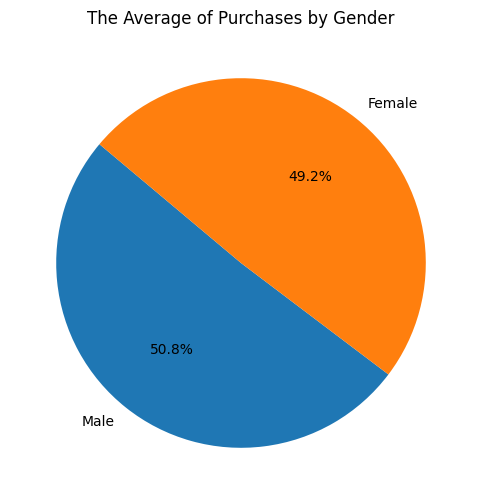

In [13]:
plt.figure(figsize= (8,6))
colors = ['#1f77b4', '#ff7f0e']
plt.pie(purch_by_gend , labels = purch_by_gend.index , autopct= '%1.1f%%' , colors = colors , startangle= 140)
plt.title('The Average of Purchases by Gender')
plt.show()

let`s drop uneeded columns

In [14]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [15]:
df.drop(columns = ['customer name' , 'customer e-mail', 'country','gender'] , inplace = True)
df

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# Split

In [16]:
target = 'car purchase amount'
X = df.drop(target , axis = 1)
y= df[target]

print("X Shape", X.shape)
print("y Shape", y.shape)

X Shape (500, 4)
y Shape (500,)


## Scaling

In [17]:
y = y.values.reshape(-1,1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y= scaler.fit_transform(y)

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

X_train Shape (400, 4)
X_test Shape (100, 4)
y_train Shape (400, 1)
y_test Shape (100, 1)


# Build Model

## Baseline

In [19]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train , y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 0.49
Baseline MAE: 0.12


## Iterate

In [20]:
model = Sequential([
    Dense(4 , activation = 'relu' , input_dim=4 ),
    Dense(16 , activation = 'relu'),
    Dense(1 , activation = 'linear')
])

model.compile(optimizer= Adamax(learning_rate= 0.001) , loss = 'mean_absolute_error')
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train , y_train , epochs= 200 , validation_split= 0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.5783 - val_loss: 0.5024
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5138 - val_loss: 0.4382
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4257 - val_loss: 0.3818
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3735 - val_loss: 0.3286
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3295 - val_loss: 0.2741
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2729 - val_loss: 0.2180
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2234 - val_loss: 0.1609
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1663 - val_loss: 0.1101
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1278 - val_loss: 0.0825
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0947 - val_loss: 0.0789
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0858 - val_loss: 0.0804
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

# Model Evaluation

In [24]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [26]:
mae_score = mean_absolute_error(y_test , y_pred)
print("MAE is",round(mae_score,5))

MAE is 0.00019


In [27]:
R2_score = r2_score(y_test , y_pred)
print("R2 Score is", round(R2_score,3))

R2 Score is 1.0
